In [1]:
import copy, math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_palette("dark")
plt.rcParams["figure.facecolor"] = "black"
sns.set_color_codes("dark")
sns.set_context("paper")
sns.set(font_scale=1.2)

## Multiple Linear Regression on a General Psychology test dataset
We're going to use a small data set https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/frame.html to apply what we've learnt about multiple linear regression. Each row is an observation of a student's Psych test results for three term exams and their finals. We'll be using three features: Exams 1, 2, and 3 to try and the student's final exam result will be the target variable

In [2]:
df = pd.read_csv("psych_test_results.csv")
df.tail()

,EXAM1,EXAM2,EXAM3,FINAL
20,82,86,90,177
21,86,82,89,175
22,78,83,85,175
23,76,83,71,149
24,96,93,95,192


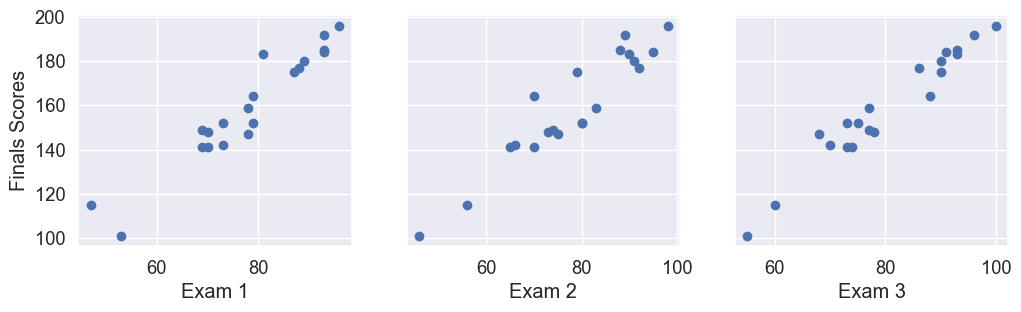

In [20]:
X = np.array(df.iloc[:,0:3])
y = np.array(df.iloc[:,3])
X_features = ["Exam 1", "Exam 2", "Exam 3"]
fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Finals Scores")
plt.show()

We can't tell that what might be the greatest predictor of finals scores much from graphing the three features (Exams 1, 2 and 3) individually against the target variable (Final test score). However, Exam three does appear to have more high scorers scoring highly on the finals as well. We'll see if that intuition holds later.

In [4]:
# Taking an 80:20 test:train split
train_size = int(X.shape[0]*0.8)
X_train = X[0:train_size,:]
y_train = y[0:train_size]
X_test = X[train_size:,:]
y_test = y[train_size:]
print("Train size is:{train_size}")

Train size is:{train_size}


In [5]:
print(f"X_train shape: {X_train.shape} and\ny_train shape: {y_train.shape}")

X_train shape: (20, 3) and
y_train shape: (20,)


In [6]:
b_init = 0
w_init = np.zeros(3,)
print(w_init.shape)

(3,)


We're carefully keeping track of the shape of our data and ensuring that our model's weights (w) have the correct shape for the number of features. 

The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector `dot product`.

Here we have 20 observations (m) and 3 features (n) in our training data.

In [7]:
def compute_cost(X, y, w, b):
    """
    
    computes cost of model
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    
    m = X.shape[0] # number of examples
    cost = 0.0 # initializing cost
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b   # dot product of the ith example. A scalar
        cost = cost + (f_wb_i - y[i])**2 # summing cost
    cost = cost/(2*m)
    return cost

In [8]:
def compute_gradient(X, y, w, b):
    """
    Computes gradient for linear regression
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar       : The gradient of the cost w.r.t. the parameter b
    """
    m,n = X.shape #m examples, n features
    # initialize gradient w.r.t paremeters 
    dj_dw = np.zeros((n,)) # vector (array) of zeros of size n
    dj_db = 0.0
    
    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_db, dj_dw    

In [9]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))  : Data, m examples with n features
      y (ndarray (m,))   : target values 
      w_in (ndarray (n,)): initial model parameters
      b_in(scalar)       : initial model paramter
      cost_function      : function to compute cost
      gradient_function  : function to compute gradient
      alpha (float)      : learning rate
      num_iters (int)    : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : updated values of parameters 
      b (scalar)       : updated value of parameter
      J (list)         : cost at 100 iteration intervals
    """
    
    w = copy.deepcopy(w_in) # Avoid altering w_in
    b = b_in
    J = [] # initializing a set to keep track of the cost every 100 iterations
    
    for i in range(num_iters):
        
        dj_db, dj_dw = gradient_function(X, y, w, b) # this stores the respective gradients so we can update w and b simultaneously i.e. 
        
        # update parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db # dj_db isn't altered by the new w value
        
        if i%100 == 0 and i !=0:
            J.append(compute_cost(X_train, y_train, w, b))

    return w, b, J

In [10]:
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'cost for parameters w and b initialized at 0: {cost}')

cost for parameters w and b initialized at 0: 12966.375


In [11]:
# carrying out multiple linear regression via gradient descent
alpha = 0.0001  # step size
w, b, J = gradient_descent(X_train, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, 2000)
print(f"For our model, the parameters w are {w} and b is {round(b, 3)}")

For our model, the parameters w are [0.44876548 0.51869705 1.04285029] and b is -0.0


### How is the model performing?
We'll first look at graphing the cost every 100 iterations to check convergence. This will allow us to adjust iterations and learning rate

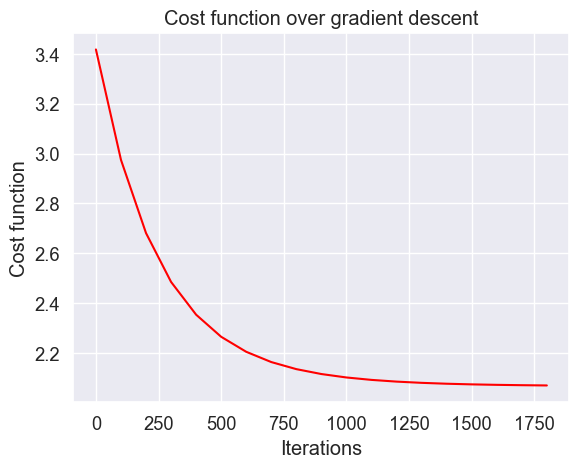

In [12]:
iterations = [i * 100 for i in range(len(J))]

sns.lineplot(x=iterations, y=J, color='red')

plt.xlabel("Iterations")
plt.ylabel("Cost function")
plt.title("Cost function over gradient descent")
plt.show()

We can see our model converging quite happily. We're already in the stage of real diminishing returns for extra iterations at our step value so we won't make further alterations

In [13]:
test_cost = math.sqrt(compute_cost(X_test, y_test, w, b)*2) # rms error
print(f"Our model has a root mean squared error of {round(test_cost, 3)} against the test data set")

Our model has a root mean squared error of 4.012 against the test data set


In [14]:
# Performance of our model against the test set. Just something to eyeball
our_predictions = np.zeros(5,)
for i in range(X_test.shape[0]):
    y = np.dot(w, X_test[0 + i]) + b
    our_predictions[i] = y # storing our test prediction in an array
    print(f"Our predicted value for observation {21+i} is: {round(y, 1)} with actual value {y_test[0 + i]}")

Our predicted value for observation 21 is: 175.3 with actual value 177
Our predicted value for observation 22 is: 173.9 with actual value 175
Our predicted value for observation 23 is: 166.7 with actual value 175
Our predicted value for observation 24 is: 151.2 with actual value 149
Our predicted value for observation 25 is: 190.4 with actual value 192


### Using Scikit-learn on the same data
We'll implement a model using sk-learn just to compare performance.

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
sk_predictions = model.predict(X_test)

In [16]:
for i in range(X_test.shape[0]):
    print(f"SKlearns predicted value for observation {21+i} is: {round(sk_predictions[0+i], 1)} with actual value {y_test[0 + i]}")

SKlearns predicted value for observation 21 is: 175.6 with actual value 177
SKlearns predicted value for observation 22 is: 174.2 with actual value 175
SKlearns predicted value for observation 23 is: 166.9 with actual value 175
SKlearns predicted value for observation 24 is: 150.8 with actual value 149
SKlearns predicted value for observation 25 is: 190.8 with actual value 192


In [17]:
our_mse= mean_squared_error (y_test, our_predictions)
sk_mse = mean_squared_error(y_test, sk_predictions)
print(f"The mse for our model: {round(our_mse,3)} vs sk's mse: {round(sk_mse,3)}")

The mse for our model: 16.1 vs sk's mse: 14.732
